In [ ]:

from numpy import unique,argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
(X_train,Y_train),(X_test,Y_test)= load_data()
X_train= X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

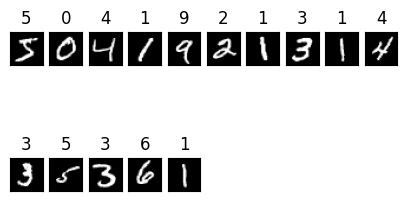

In [ ]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
  ax = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(X_train[i]),cmap='gray')
  ax.set_title(Y_train[i])

In [ ]:
img_shape= X_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [ ]:
#defining the model
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=img_shape))
model.add(MaxPool2D(2,2))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

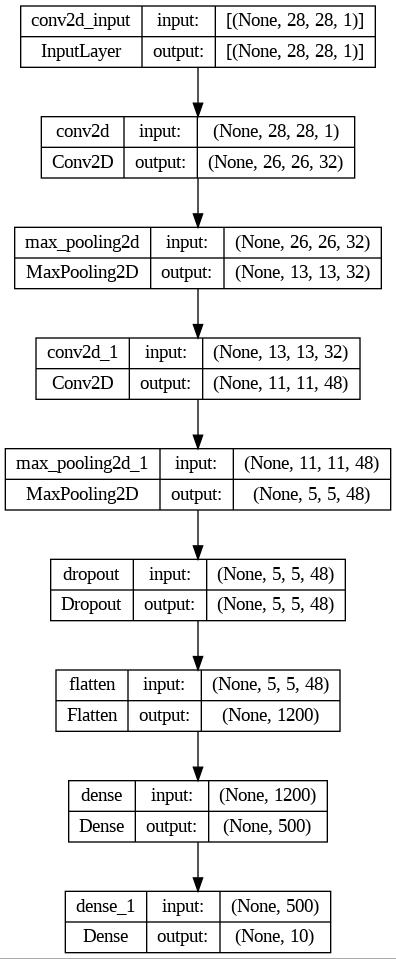

In [ ]:
plot_model(model,'model.jpeg',show_shapes=True)

In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history =model.fit(X_train,Y_train,batch_size= 128,epochs=5,verbose=3,validation_split=0.1)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [ ]:
loss,accuracy=  model.evaluate(X_test,Y_test,verbose=0)

In [ ]:
print(f'Accuracy:{accuracy*100}')

Accuracy:99.05999898910522


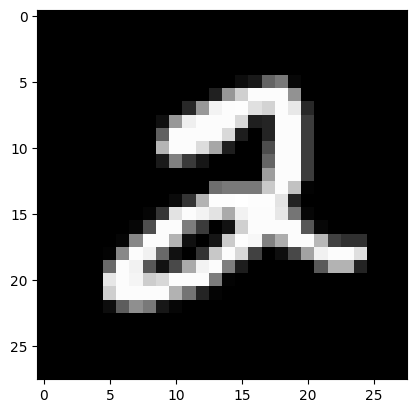

In [ ]:
image=X_train[5]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()


In [ ]:
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p= model.predict([image])
print('Predicted:{}'.format(argmax(p)))